# samples of graphics

In [35]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
import seaborn as sns

p1t1z = pd.read_csv('vdata.csv')
p1t1z.head(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,0.0,0.0
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0


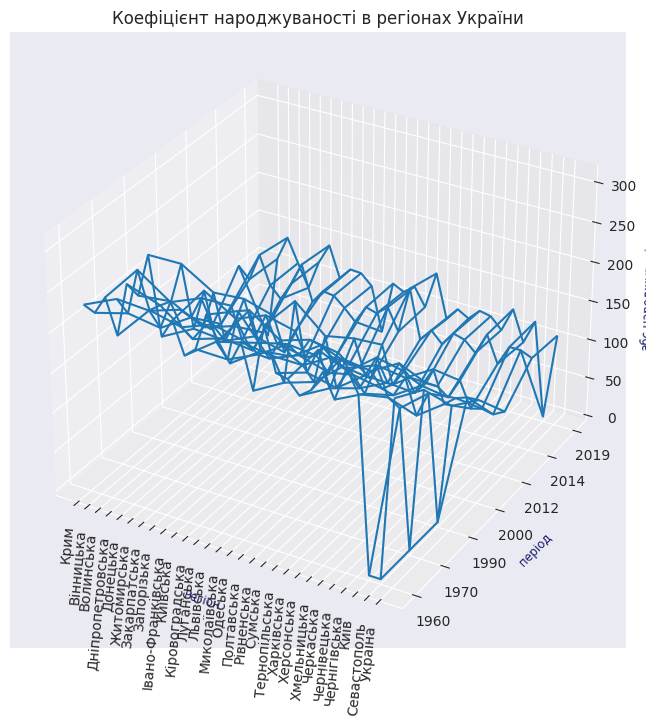

In [36]:
def draw_3d(df: pd.DataFrame, x_column: str, y_label: str, z_label: str, title: str) -> None:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')

    xl = np.array(df[x_column])
    yl = np.array(df.columns)[1:]
    plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
    plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
    plt.xlabel(x_column, fontsize='small', color='midnightblue')
    plt.ylabel(y_label, fontsize='small', color='midnightblue')
    ax.set_zlabel(z_label, fontsize='small', color='midnightblue')
    plt.title(title, fontsize=12)

    x, y = np.meshgrid(
        np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

    ax.plot_wireframe(
                    x,
                    y,
                    df.to_numpy()[x, y],
                    )

    plt.show()


draw_3d(p1t1z, 'Регіон', 'період', 'абс.народжуваність', title='Коефіцієнт народжуваності в регіонах України')

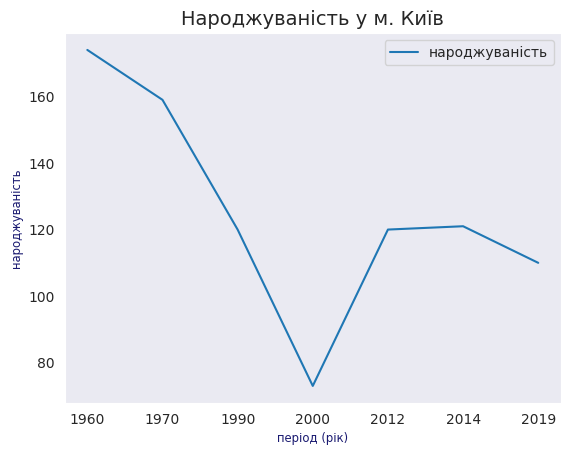

In [37]:
def draw_2d(df: pd.DataFrame, by_col: str, line: str, indicator: str, title: str) -> None:
    period = np.array(df.columns)[2:]
    plt.plot(period, np.array(
        np.array(df[df[by_col] == line].iloc[0][2:])), label=indicator)

    plt.xlabel('період (рік)', fontsize='small', color='midnightblue')
    plt.ylabel(indicator, fontsize='small', color='midnightblue')
    plt.title(title, fontsize=14)
    # plt.text(period[0], 15, '"неповні дані"', color="blue")
    plt.grid()
    plt.legend()

    plt.show()


draw_2d(p1t1z, 'Регіон', 'Київ', 'народжуваність', 'Народжуваність у м. Київ')

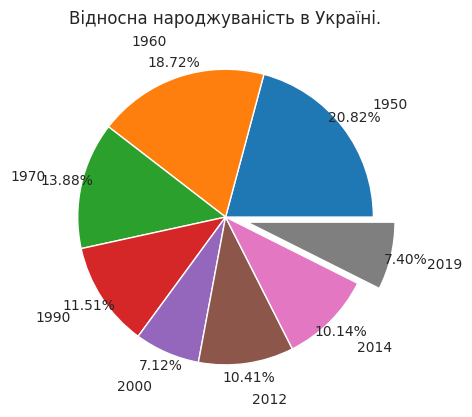

In [38]:
def draw_pie(df: pd.DataFrame, by_col: str, line: str, title: str) -> None:
    labels = np.array(df.columns)[1:]

    data = np.array(df[df[by_col] == line].iloc[0][1:])
    explode = [0 for _ in df[df[by_col] == line]][:-2] + [0.15]
    plt.pie(
        data,
        labels=labels,
        shadow=False,
        explode=explode,
        autopct="%.2f%%",
        pctdistance=1.10,
        labeldistance=1.25,
    )

    plt.title(title, fontsize=12)
    plt.show()

draw_pie(p1t1z, 'Регіон', 'Україна', title='Відносна народжуваність в Україні.')

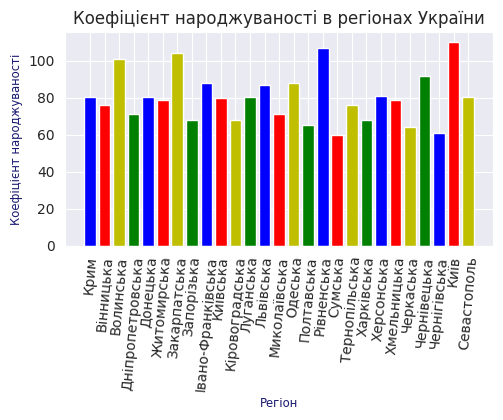

In [39]:
def draw_bar(df: pd.DataFrame, by_col: str, type: str, indicator: str, title: str) -> None:
    # Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
    colors = []
    [colors.extend(['b', 'r', 'y', 'g'])
        for _ in range(len(df[by_col]) // 4 + 1)]
    plt.bar(
            df[by_col],
            df[type],
            color=colors[:len(df[by_col])]
            # angle=-0.5
            )

    plt.xlabel(by_col, fontsize='small', color='midnightblue')
    plt.ylabel(indicator, fontsize='small', color='midnightblue')
    plt.title(title, fontsize=12)
    plt.xticks(rotation=85)
    plt.grid(True)
    plt.subplots_adjust(
                        top=0.935,
                        bottom=0.49,
                        left=0.14,
                        right=0.81,
                        hspace=0.2,
                        wspace=0.2
                        )
    plt.show()


p1t1zm = p1t1z.replace(
                       to_replace=0,
                       value=np.nan,
                       inplace=False,
                       )
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
new_p1t1 = p1t1zm.drop(p1t1zm.shape[0]-1)
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
new_p1t1 = new_p1t1.fillna({key: new_p1t1[key].mean() for key in new_p1t1.columns[1:]})


draw_bar(new_p1t1, 'Регіон', '2019', 'Коефіцієнт народжуваності', 'Коефіцієнт народжуваності в регіонах України')

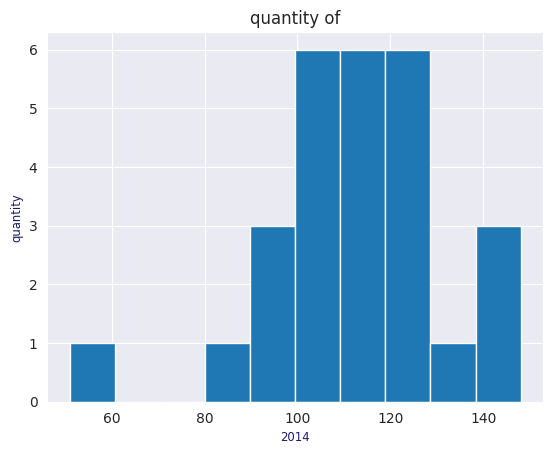

In [40]:
plt.hist(new_p1t1['2014'])
plt.xlabel('2014', fontsize='small', color='midnightblue')
plt.ylabel('quantity', fontsize='small', color='midnightblue')
plt.title('quantity of', fontsize=12)
plt.show()

- https://stackoverflow.com/questions/53917483/how-to-show-labels-in-seaborn-plots-no-handles-with-labels-found-to-put-in-lege

In [41]:
p3t1 = pd.read_csv('v2dataset.csv')
p3t1.columns = ['name', 'author', 'user_rating',
                'reviews', 'price', 'year', 'genre']

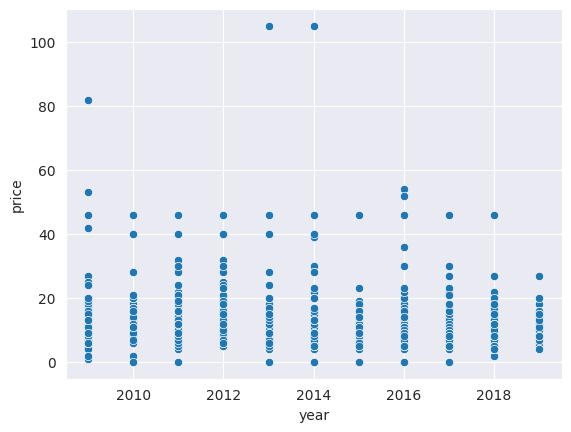

In [42]:
plt.figure()
sns.scatterplot(x='year', y='price', data=p3t1)
plt.show()

/home/denys/.cache/pypoetry/virtualenvs/datas-cYPLqW4U-py3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/denys/.cache/pypoetry/virtualenvs/datas-cYPLqW4U-py3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/denys/.cache/pypoetry/virtualenvs/datas-cYPLqW4U-py3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/denys/.cache/pypoetry/virtualenvs/datas-cYPLqW4U-py3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want 

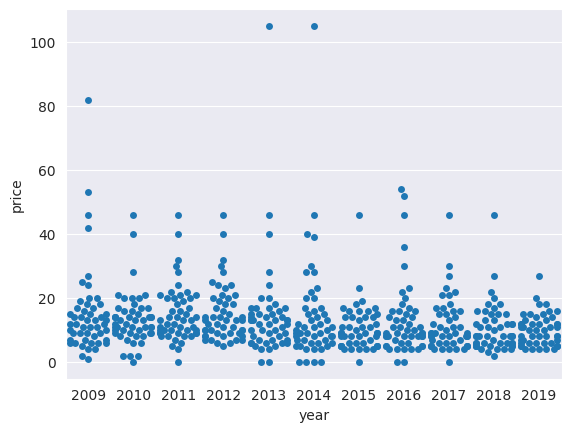

In [43]:
plt.figure()
sns.swarmplot(x='year', y='price', data=p3t1)
plt.show()

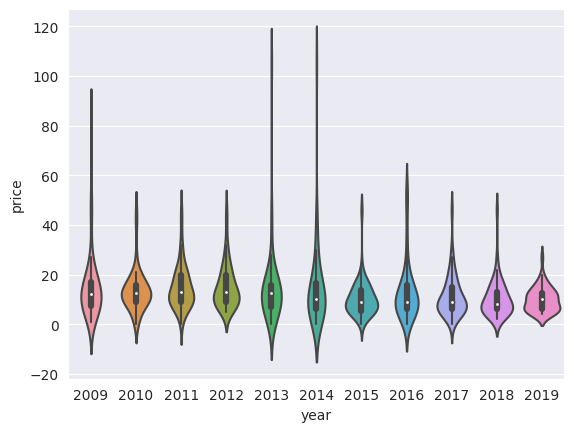

In [44]:
plt.figure()
sns.violinplot(x="year", y="price", data=p3t1)
plt.show()

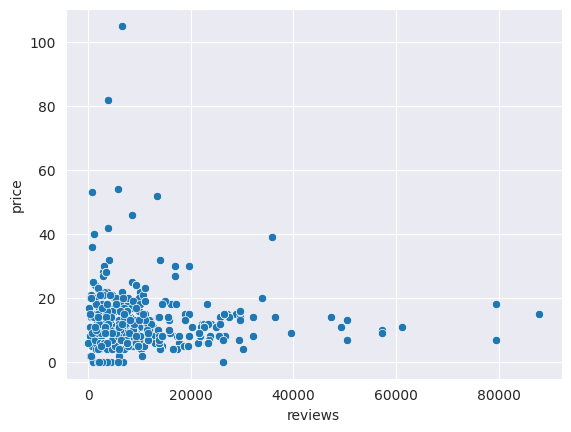

In [45]:
plt.figure()
sns.set_style('darkgrid')
sns.scatterplot(x='reviews', y='price', data=p3t1)
plt.show()

In [46]:
p1t1z.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,0.0,0.0
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,0.0


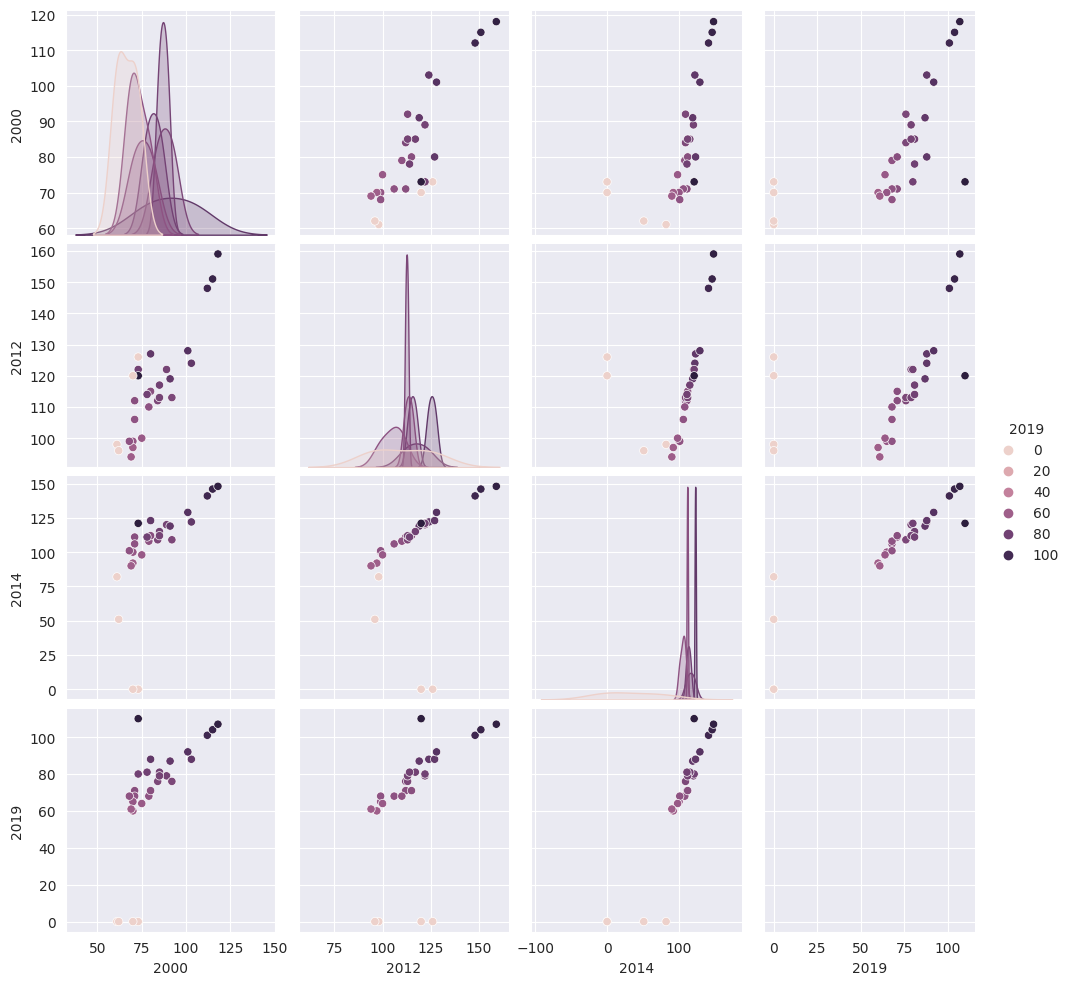

In [47]:
sns.pairplot(
             p1t1z,
             vars=['2000', '2012', '2014', '2019'],
             hue='2019'
             )

In [48]:
# [create_plot(data=data_draw[:, [0, el]], title=f'mse-{el}(alpha)', xlabel='alpha', ylabel=f'mse-{el}', figsize=(12, 6)) for el in range(1, data_draw.shape[1])]

- https://sparkbyexamples.com/numpy/numpy-array-mean-function/

- https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels

<Figure size 600x600 with 0 Axes>

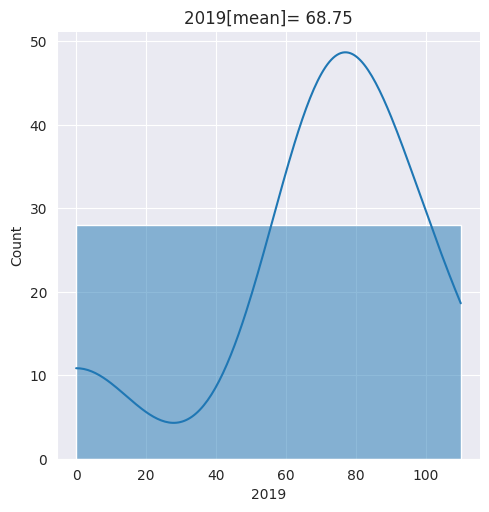

count     28.000000
mean      68.750000
std       31.561375
min        0.000000
25%       64.750000
50%       76.000000
75%       87.250000
max      110.000000
Name: 2019, dtype: float64


<Figure size 600x600 with 0 Axes>

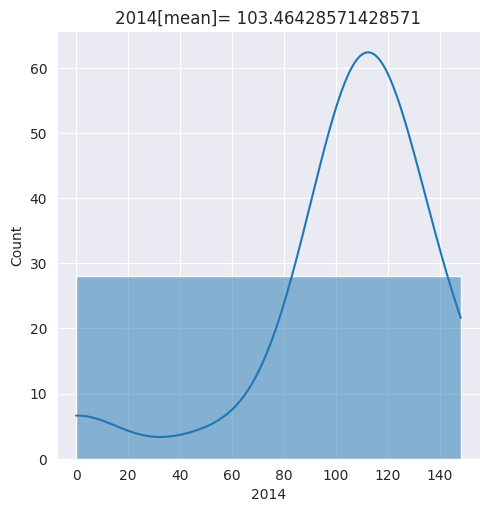

count     28.000000
mean     103.464286
std       35.051795
min        0.000000
25%       99.500000
50%      111.000000
75%      121.000000
max      148.000000
Name: 2014, dtype: float64


In [55]:
def seaborn_displots(df: pd.DataFrame) -> None:
    for i in df:
        plt.figure(figsize=(6,6))
        sns.displot(df[i], kde=True, bins=int(df.shape[0]*0.045))
        plt.title(label=f'{i}[mean]= {df[i].mean()}')
        plt.show()
        print(df[i].describe())

seaborn_displots(p1t1z[['2019', '2014']])

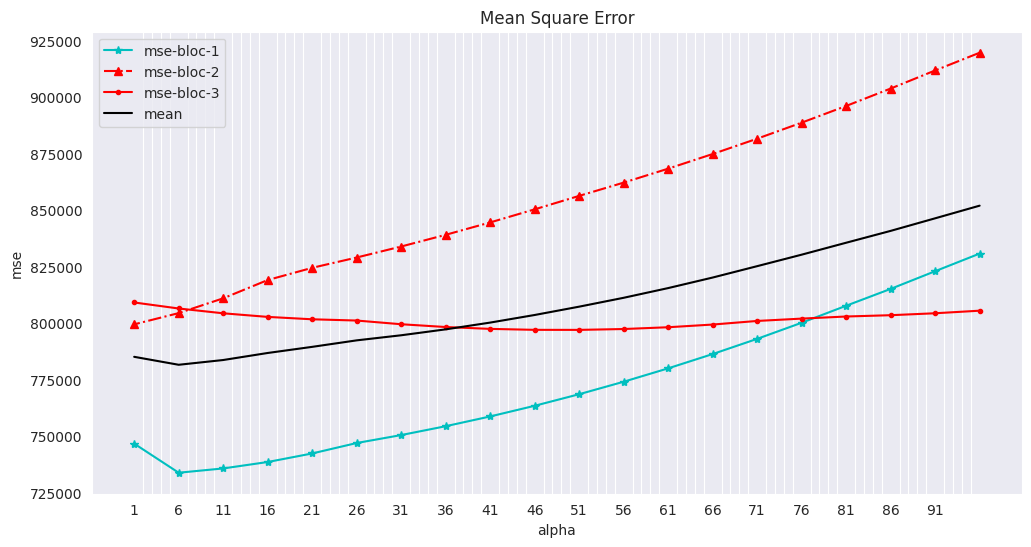

In [59]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import scale
from sklearn.utils import shuffle


df = pd.read_csv('bikes_rent.csv')

df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']

alphas = np.arange(1, 100, 5)
alphas_size = alphas.shape[0]

regressor = LassoCV(cv=3, alphas=alphas, random_state=0).fit(X, y)

data_draw = np.append(regressor.alphas_.reshape(alphas_size,1), regressor.mse_path_.reshape(alphas_size,3), axis=1)


def create_plots_in_one(data: np.array, title: str, xlabel: str, ylabel: str, figsize: tuple|None=None) -> None:
    """First column as x."""
    size = figsize or (15, 5)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    major_ticks = np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 5)
    minor_ticks = np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)

    x = list(map(lambda e: e[0], data))
    for el in range(1, data.shape[1]):
        y = list(map(lambda e: e[el], data))
        plt.plot(
                 x, 
                 y, 
                 label=f'mse-bloc-{el}', 
                 color=random.choice('rgbcmyk'), 
                 linestyle=random.choice(['-', '--', '-.', ':', None]),
                 marker=random.choice('o+xdvs*.^')
                 )

    plt.plot(x, np.mean(data[:, 1:], axis = 1), label='mean', color='k', linestyle=None)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    ax.grid(which='both')
    plt.show()

create_plots_in_one(data=data_draw, title=f'Mean Square Error', xlabel='alpha', ylabel=f'mse', figsize=(12, 6))

In [60]:
data_draw

array([[9.60000000e+01, 8.30768687e+05, 9.19721936e+05, 8.05481545e+05],
       [9.10000000e+01, 8.22965904e+05, 9.11867545e+05, 8.04343028e+05],
       [8.60000000e+01, 8.15129086e+05, 9.03855551e+05, 8.03483747e+05],
       [8.10000000e+01, 8.07667982e+05, 8.96148952e+05, 8.02906093e+05],
       [7.60000000e+01, 8.00137233e+05, 8.88747724e+05, 8.01974931e+05],
       [7.10000000e+01, 7.93005662e+05, 8.81651863e+05, 8.00937921e+05],
       [6.60000000e+01, 7.86275367e+05, 8.74861368e+05, 7.99342370e+05],
       [6.10000000e+01, 7.79946350e+05, 8.68376237e+05, 7.98151128e+05],
       [5.60000000e+01, 7.74018610e+05, 8.62196470e+05, 7.97363633e+05],
       [5.10000000e+01, 7.68492147e+05, 8.56322065e+05, 7.96979896e+05],
       [4.60000000e+01, 7.63366962e+05, 8.50359872e+05, 7.96999926e+05],
       [4.10000000e+01, 7.58643054e+05, 8.44566956e+05, 7.97423733e+05],
       [3.60000000e+01, 7.54320422e+05, 8.39080963e+05, 7.98251324e+05],
       [3.10000000e+01, 7.50399069e+05, 8.33901907e

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns


df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)